In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [33]:
data = pd.read_csv("/kaggle/input/breast-cancer/breast cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

In [36]:
M = data[data.diagnosis == 'M']
B = data[data.diagnosis == 'B']

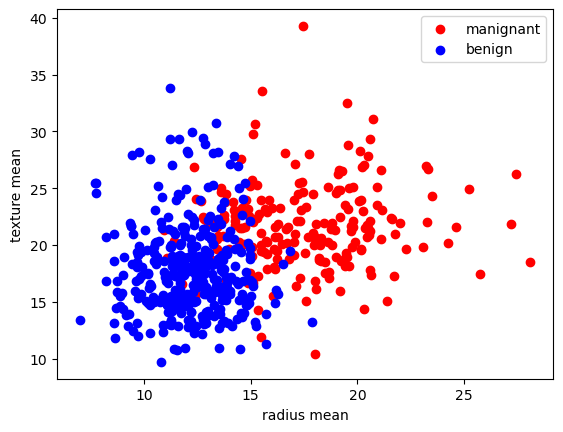

In [37]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="manignant")
plt.scatter(B.radius_mean,B.texture_mean,color="blue",label="benign")
plt.xlabel("radius mean")
plt.ylabel("texture mean")
plt.legend()
plt.show()

In [38]:
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [39]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [40]:
x.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315
568,0.036869,0.501522,0.028540,0.015907,0.000000,0.074351,0.000000,0.000000,0.266162,0.187026,...,0.054287,0.489072,0.043578,0.020497,0.124084,0.036043,0.000000,0.000000,0.257441,0.100682


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [42]:
from sklearn.svm import SVC
svc= SVC(random_state=55)
svc.fit(x_train,y_train)

SVC(random_state=55)

In [43]:
svc.score(x_test,y_test)

0.9649122807017544

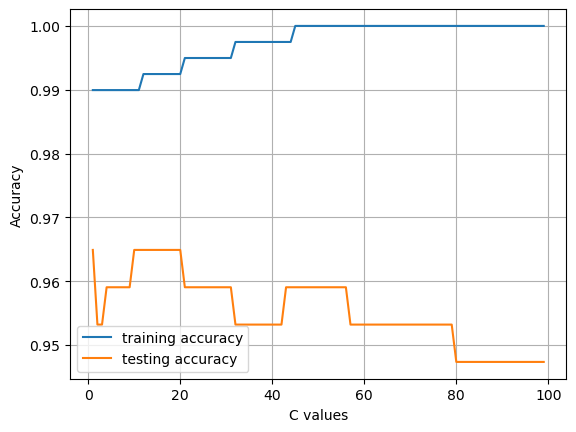

In [44]:
train_accuracy = []
test_accuracy = []
for i in range(1,100):
    svm = SVC(C=i)
    svm.fit(x_train,y_train)
    train_accuracy.append(svm.score(x_train,y_train))
    test_accuracy.append(svm.score(x_test,y_test))
    
plt.plot(range(1,100),train_accuracy,label="training accuracy")
plt.plot(range(1,100),test_accuracy,label="testing accuracy")
plt.legend()
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [45]:
print("Best accuracy is {} when C = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.9649122807017544 when C = 1
